In [ ]:
#Electrical Engineering and Systems Science
import requests
from bs4 import BeautifulSoup

# Initialize a variable to keep track of the number of titles to scrape
titles_to_scrape = 1000
titles_scraped = 0
years = [23, 22, 21, 20, 19, 18, 17]

# Create separate lists for each year using globals()
for year in years:
    globals()[f'title_list_20{year}'] = []

for year in years:
    titles_scraped = 0
    page_number = 0
    while titles_scraped < titles_to_scrape:
        # Construct the URL with the appropriate year and page number
        area_url = f"https://arxiv.org/list/eess/{year}?skip={25 * page_number}&show=25"
        response = requests.get(area_url)

        if response.status_code == 200:

            soup = BeautifulSoup(response.text, 'html.parser')

            # Find all elements with the class "list-title mathjax"
            elements = soup.find_all('div', class_='list-title mathjax')

            # Iterate through the elements and extract the titles
            for element in elements:
                title = element.span.next_sibling.strip()  # Removes the "Title:" prefix
                titles_scraped += 1
                globals()[f'title_list_20{year}'].append(title)


                if titles_scraped == titles_to_scrape:
                    break

            page_number += 1




In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

stemmer = PorterStemmer()

years = [23, 22, 21, 20, 19, 18, 17]

for year in years:
    title_list = globals()[f'title_list_20{year}']

    processed_title_list = []

    # Process titles in the original list
    for title in title_list:
        # Convert to lowercase
        title = title.lower()

        # Tokenize the title
        tokens = word_tokenize(title)

        # Perform stemming
        stemmed_tokens = [stemmer.stem(token) for token in tokens]

        # Join the stemmed tokens to form the processed title
        processed_title = ' '.join(stemmed_tokens)

        processed_title_list.append(processed_title)

    # Store the new list of processed titles
    globals()[f'processed_title_list_20{year}'] = processed_title_list


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top 20 Most Frequent Words for Year 2023:
system: 142
learn: 123
network: 123
imag: 102
model: 102
use: 98
control: 85
deep: 77
neural: 60
data: 57
base: 56
detect: 54
commun: 51
optim: 51
analysi: 49
via: 41
predict: 41
gener: 40
estim: 39
power: 37


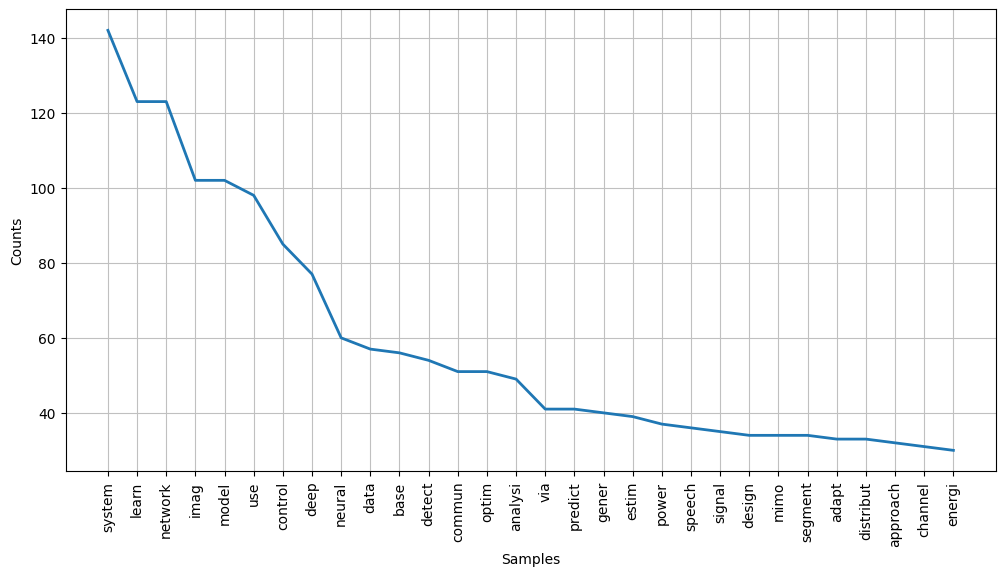

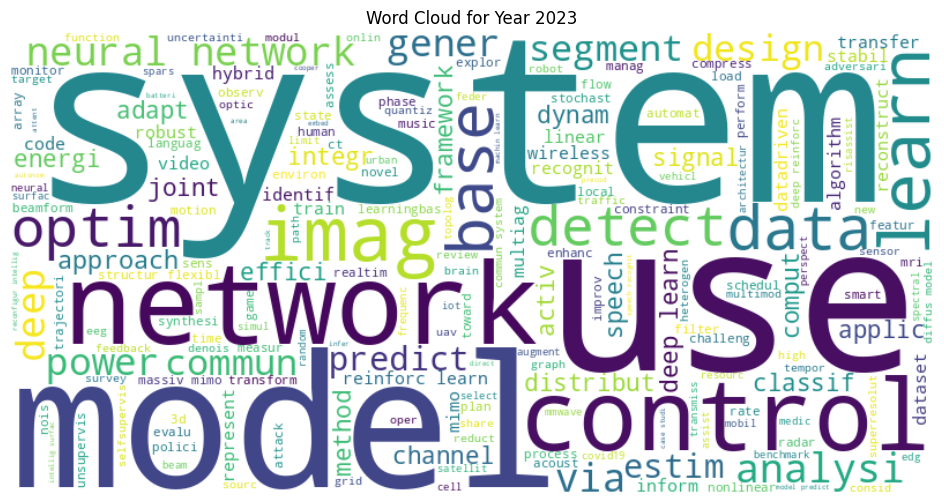

Top 20 Most Frequent Words for Year 2022:
network: 148
use: 141
learn: 137
imag: 128
system: 97
control: 89
deep: 88
model: 84
base: 75
neural: 63
detect: 58
optim: 57
segment: 56
commun: 54
speech: 48
estim: 47
recognit: 44
data: 42
analysi: 42
predict: 40


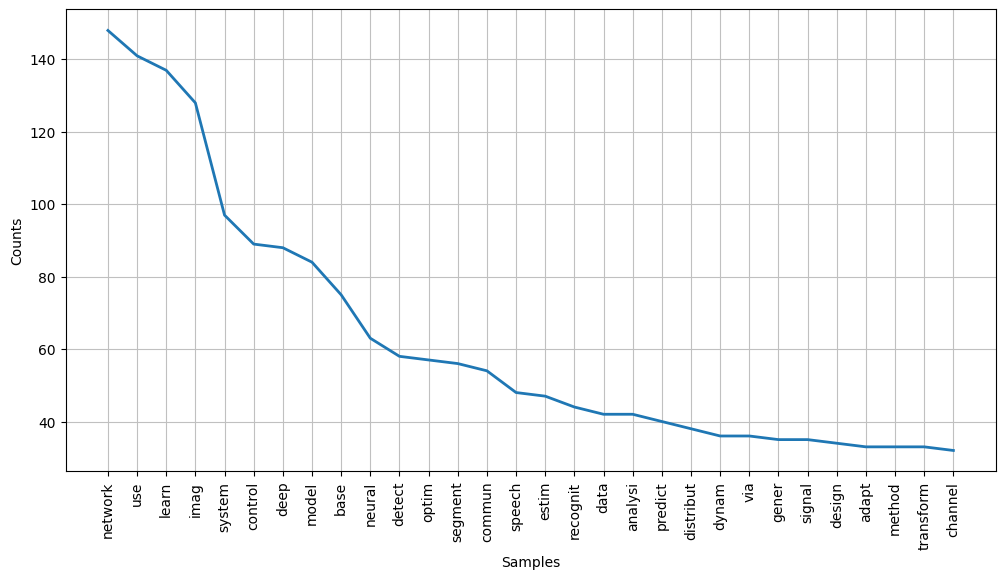

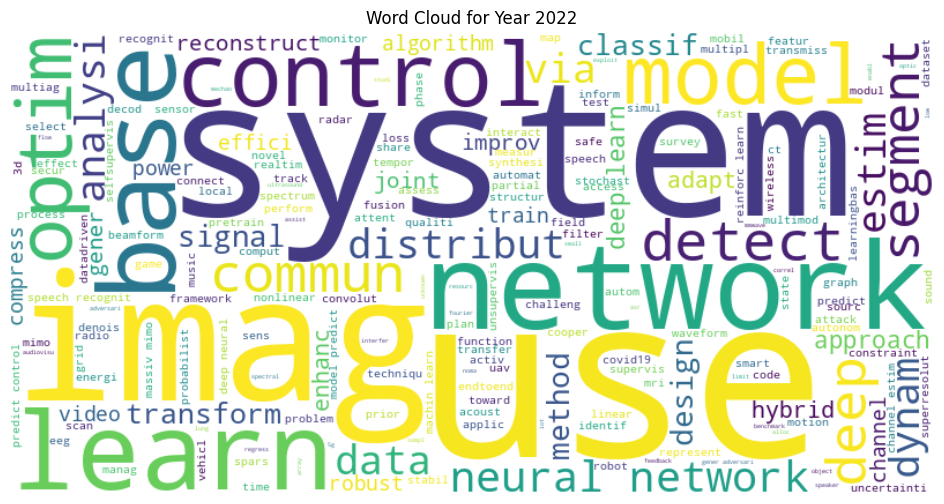

Top 20 Most Frequent Words for Year 2021:
learn: 174
use: 147
system: 146
imag: 138
network: 123
deep: 120
model: 94
control: 86
base: 67
detect: 60
segment: 59
analysi: 56
neural: 53
optim: 52
estim: 51
gener: 48
commun: 46
data: 44
design: 42
via: 39


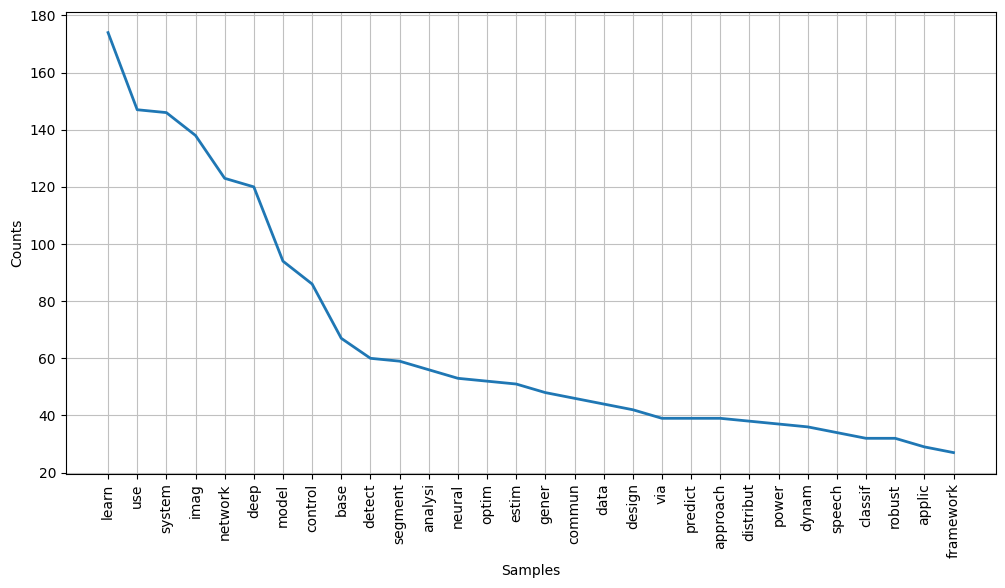

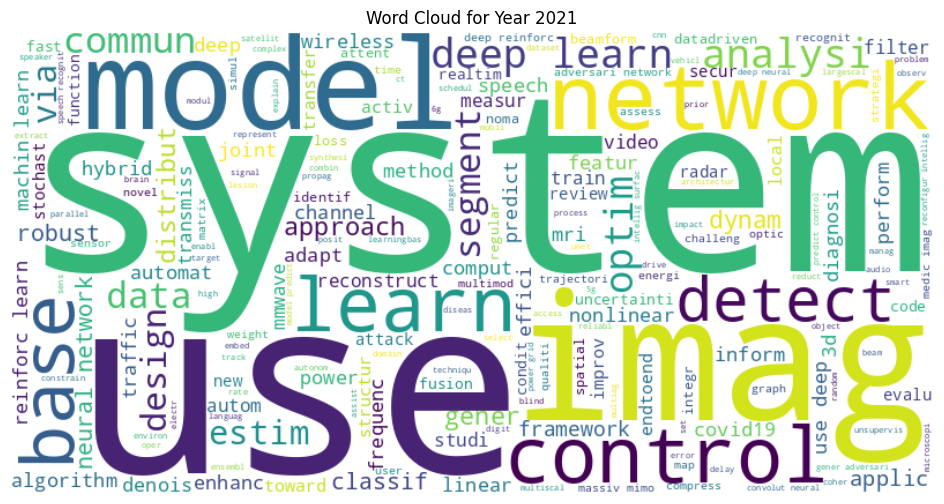

Top 20 Most Frequent Words for Year 2020:
network: 175
learn: 134
imag: 127
system: 125
use: 121
deep: 101
control: 82
model: 78
neural: 76
detect: 73
base: 58
segment: 52
data: 51
optim: 49
gener: 48
speech: 42
analysi: 41
estim: 41
approach: 39
distribut: 37


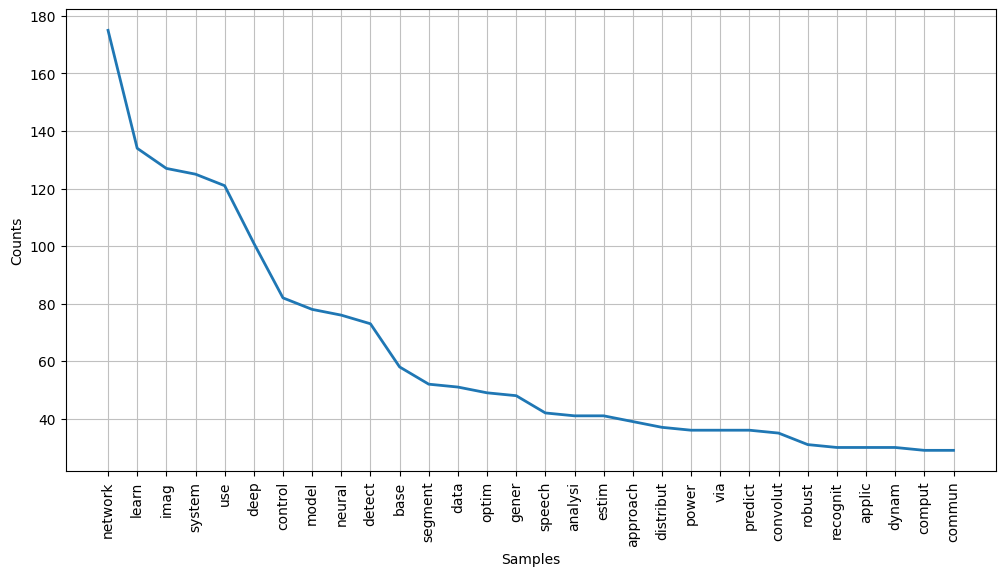

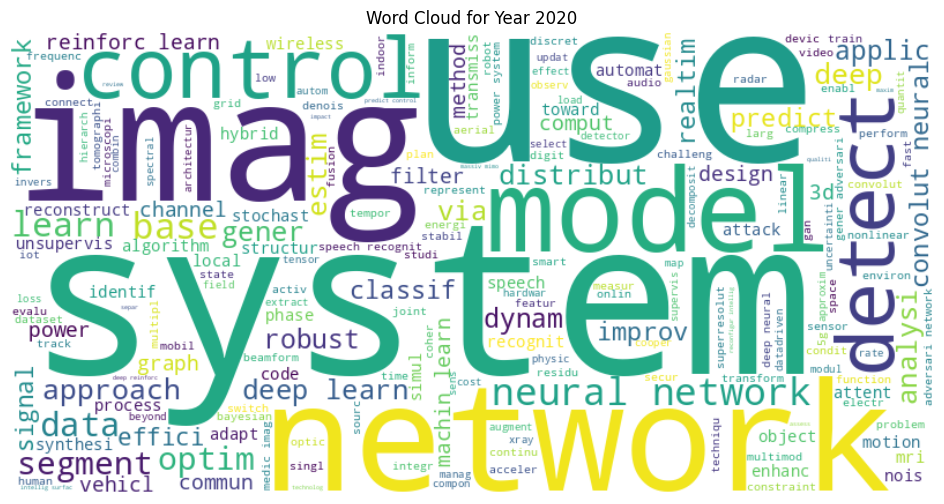

Top 20 Most Frequent Words for Year 2019:
network: 146
use: 120
imag: 117
learn: 112
system: 107
deep: 87
base: 87
detect: 74
neural: 71
model: 68
mimo: 58
commun: 57
channel: 54
data: 48
speech: 48
analysi: 47
signal: 46
estim: 46
optim: 44
algorithm: 43


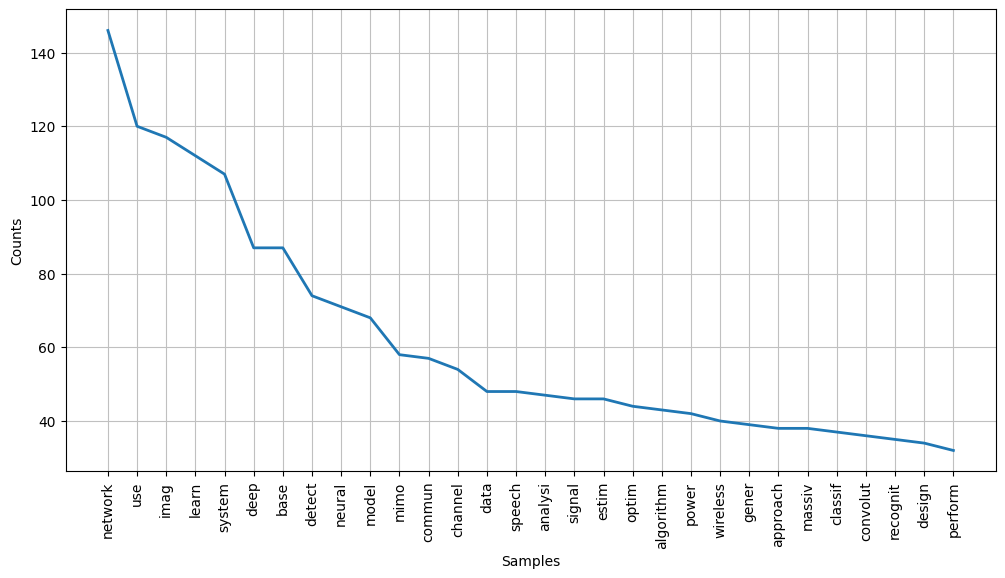

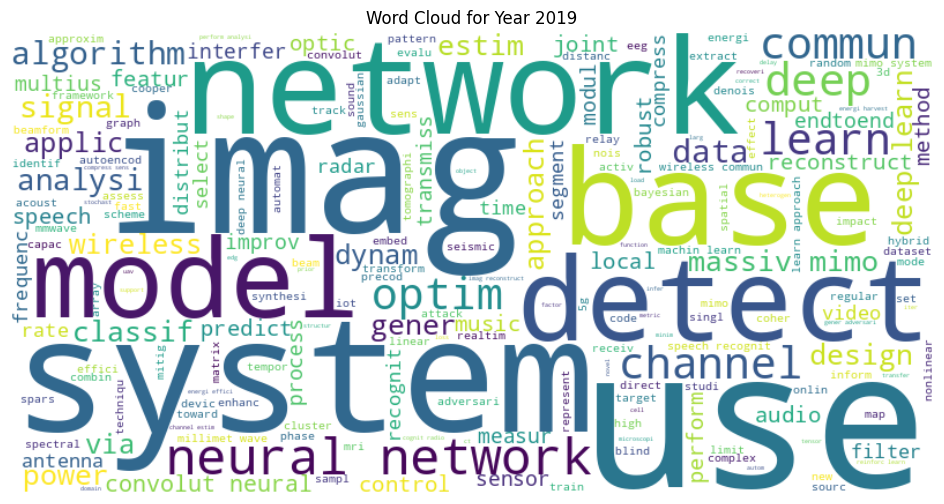

Top 20 Most Frequent Words for Year 2018:
network: 153
use: 134
system: 96
imag: 86
model: 84
base: 81
signal: 67
learn: 63
speech: 63
commun: 58
neural: 58
estim: 57
analysi: 53
detect: 53
optim: 51
algorithm: 48
deep: 47
data: 44
recognit: 43
mimo: 43


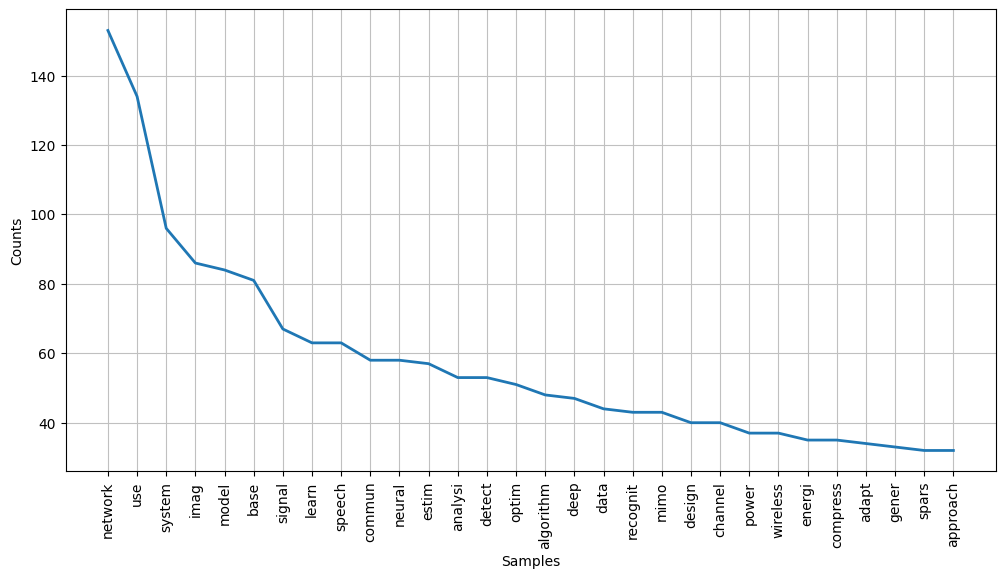

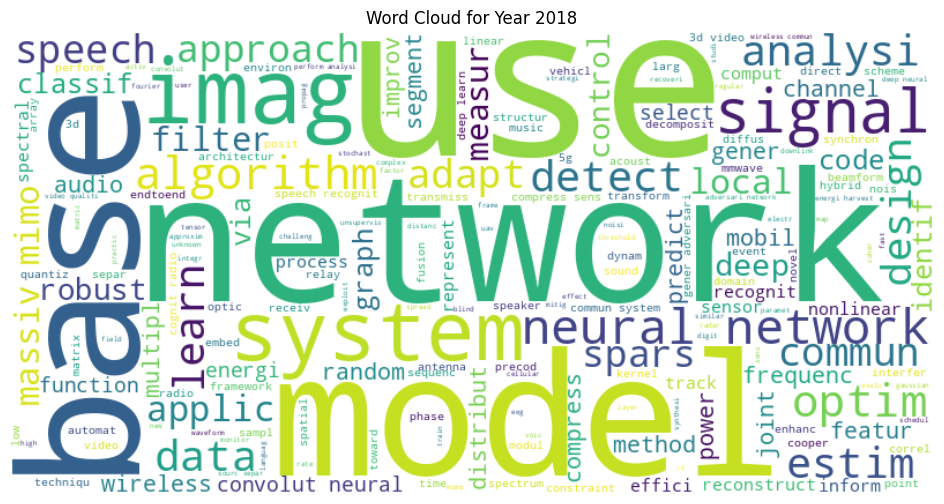

Top 20 Most Frequent Words for Year 2017:
network: 173
use: 141
deep: 108
learn: 102
speech: 92
detect: 90
system: 84
base: 80
music: 77
analysi: 77
model: 75
imag: 75
audio: 69
neural: 67
eeg: 65
event: 58
gener: 57
classif: 55
approach: 52
estim: 51


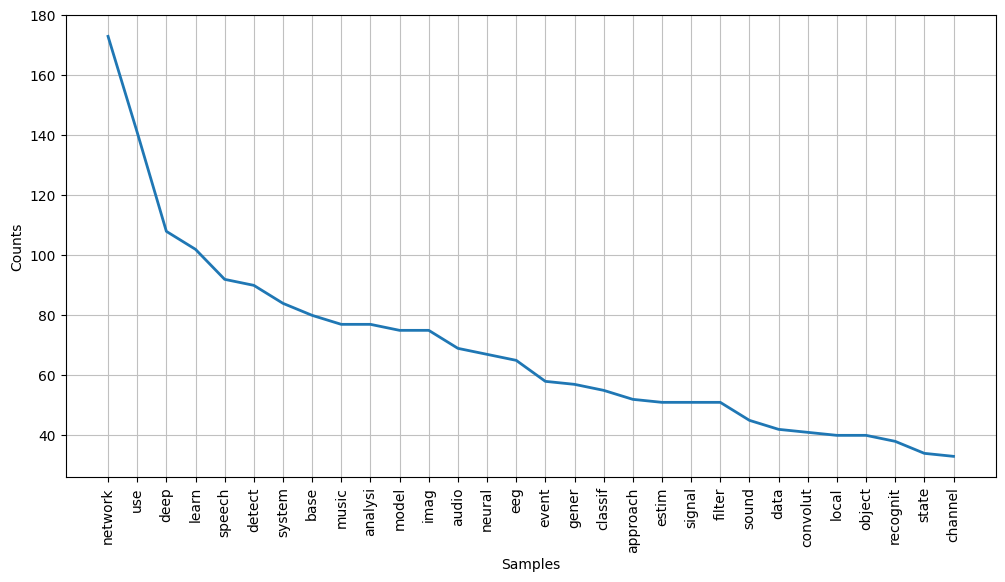

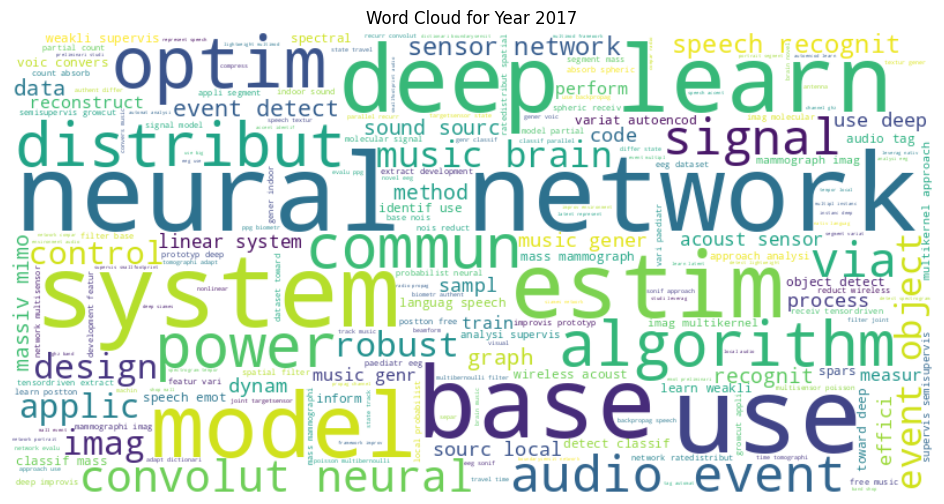

In [ ]:
from wordcloud import WordCloud

for year in years:
    processed_title_list = globals()[f'processed_title_list_20{year}']

    # Combine processed titles into a single string
    all_titles = ' '.join(processed_title_list)

    # Tokenize the combined text
    tokens = word_tokenize(all_titles)

    # Create a frequency distribution of words
    word_freq = nltk.FreqDist(tokens)
    top_20_words = Counter(tokens).most_common(20)

    # Print the top 20 words
    print(f"Top 20 Most Frequent Words for Year 20{year}:")
    for word, freq in top_20_words:
        print(f"{word}: {freq}")

    # Create a separate figure for the word frequency graph
    plt.figure(figsize=(12, 6))
    word_freq.plot(30, cumulative=False)
    plt.show()

    # Create a separate figure for the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Year 20{year}")
    plt.show()
